##  OLA - Ensemble Learning

**Project Submission : 02 Dec**



**Problem Statement**

```Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.```

```As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.```

```You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like```


```Demographics (city, age, gender etc.)```


```Tenure information (joining date, Last Date)```


```Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)```





**Column Profiling:**



- MMMM-YY : Reporting Date (Monthly)





- Driver_ID : Unique id for drivers



- Age : Age of the driver



- Gender : Gender of the driver – Male : 0, Female: 1



- City : City Code of the driver



- Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate



- Income : Monthly average Income of the driver


- Date Of Joining : Joining date for the driver



- LastWorkingDate : Last date of working for the driver



- Joining Designation : Designation of the driver at the time of joining



- Grade : Grade of the driver at the time of reporting



- Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)



- Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)


**Concepts Tested:**

```Ensemble Learning- Bagging```


```Ensemble Learning- Boosting```


```KNN Imputation of Missing Values```


```Working with an imbalanced dataset```


**What "good" looks like:**

- Import the dataset and do usual exploratory analysis steps like checking the structure & characteristics of the dataset.


-  Convert date-like features to their respective data type



- Check for missing values and Prepare data for KNN Imputation



- You may consider only numerical features for this purpose


- Aggregate data in order to remove multiple occurrences of same driver data (We did something similar in Delhivery business Case)



- You can start from storing unique Driver IDs in an empty dataframe and then bring all the features at same level (Groupby Driver ID)



**Feature Engineering Steps:**

- Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1



- Target variable creation: Create a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1



- Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1



- Statistical summary of the derived dataset


- Check correlation among independent variables and how they interact with each other



- One hot encoding of the categorical variable



- Class Imbalance Treatment



- Standardization of training data



- Using Ensemble learning - Bagging, Boosting methods with some hyper-parameter tuning



**Results Evaluation:**

- Classification Report

- ROC AUC curve

- Provide actionable Insights & Recommendations


```Evaluation Criteria (100 Points):```



***Define Problem Statement and perform Exploratory Data Analysis (10 points)***



- Definition of problem (as per given problem statement with additional views)


- Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.


- Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)


- Bivariate Analysis (Relationships between important variables)


- Illustrate the insights based on EDA


- Comments on range of attributes, outliers of various attributes


- Comments on the distribution of the variables and relationship between them


- Comments for each univariate and bivariate plots



```Data Preprocessing (50 Points)```



- KNN Imputation



- Feature Engineering



- Class Imbalance treatment



- Standardization



- Encoding



***Model building (20 Points)***



- 1 Ensemble - Bagging Algorithm



- 1 Ensemble - Boosting Algorithm




***Results Evaluation (10 Points)***



- ROC AUC Curve & comments



- Classification Report (Confusion Matrix etc)



***Actionable Insights & Recommendations (10 Points)***


---
---
---
---
# **$PROJECT$    $STARTS$     $HERE$**
----
---
---
---

In [1]:
import pandas as pd
import numpy as np 
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('ola_driver_scaler.csv')
df1  = pd.read_csv('ola_driver_scaler.csv')

In [3]:
df.shape

(19104, 14)

In [4]:
df['LastWorkingDate']= pd.to_datetime(df['LastWorkingDate'])
df['Dateofjoining']= pd.to_datetime(df['Dateofjoining'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            19104 non-null  int64         
 1   MMM-YY                19104 non-null  object        
 2   Driver_ID             19104 non-null  int64         
 3   Age                   19043 non-null  float64       
 4   Gender                19052 non-null  float64       
 5   City                  19104 non-null  object        
 6   Education_Level       19104 non-null  int64         
 7   Income                19104 non-null  int64         
 8   Dateofjoining         19104 non-null  datetime64[ns]
 9   LastWorkingDate       1616 non-null   datetime64[ns]
 10  Joining Designation   19104 non-null  int64         
 11  Grade                 19104 non-null  int64         
 12  Total Business Value  19104 non-null  int64         
 13  Quarterly Rating

In [5]:
df.isnull().mean()

Unnamed: 0              0.000000
MMM-YY                  0.000000
Driver_ID               0.000000
Age                     0.003193
Gender                  0.002722
City                    0.000000
Education_Level         0.000000
Income                  0.000000
Dateofjoining           0.000000
LastWorkingDate         0.915410
Joining Designation     0.000000
Grade                   0.000000
Total Business Value    0.000000
Quarterly Rating        0.000000
dtype: float64

In [6]:
# Aggrigating all the columns with Driver's ID

Age = pd.DataFrame(
    df.groupby(
        by=["Driver_ID"])['Age'].max().astype(float).round(2)).reset_index()
Gender = pd.DataFrame(
    df.groupby(by=["Driver_ID"])['Gender'].unique().str[0]).reset_index()
City = pd.DataFrame(
    df.groupby(by=["Driver_ID"])['City'].unique().str[0]).reset_index()
Education_Level = pd.DataFrame(
    df.groupby('Driver_ID')['Education_Level'].unique().str[0]).reset_index()
Income = pd.DataFrame(
    df.groupby(by=["Driver_ID"])['Income'].sum()).reset_index().astype(int)
Dateofjoining = pd.DataFrame(
    df.groupby(by=["Driver_ID"])['Dateofjoining'].unique().str[0]).reset_index()
LastWorkingDate = pd.DataFrame(
    df.groupby(by=["Driver_ID"])['LastWorkingDate'].unique().str[1]).reset_index()
Joining_Designation = pd.DataFrame(
    df.groupby(by=["Driver_ID"])
    ['Joining Designation'].unique().str[0].astype(int)).reset_index()
Total_Business_Value = pd.DataFrame(
    df.groupby(
        by=["Driver_ID"])['Total Business Value'].sum().astype(int)).reset_index()
Grade = pd.DataFrame(
    df.groupby(by=["Driver_ID"])['Grade'].mean()).reset_index()
Quarterly_Rating = pd.DataFrame(
    df.groupby(
        by=["Driver_ID"])['Quarterly Rating'].mean().round(2)).reset_index()
times_reported = pd.DataFrame(
    df.groupby(by=["Driver_ID"])['MMM-YY'].nunique()).reset_index().rename(
                   columns={'MMM-YY': 'times_reported'})

In [7]:
# Mearging all the columns on Driver's ID. 

df2 = Age.merge(Gender,on='Driver_ID')
df2 = df2.merge(City,on='Driver_ID')
df2 = df2.merge(Education_Level,on='Driver_ID')
df2 = df2.merge(Income,on='Driver_ID')
df2 = df2.merge(Dateofjoining,on='Driver_ID')
df2 = df2.merge(LastWorkingDate,on='Driver_ID')
df2 = df2.merge(Joining_Designation,on='Driver_ID')
df2 = df2.merge(Grade,on='Driver_ID')
df2 = df2.merge(Quarterly_Rating,on='Driver_ID')
df2 = df2.merge(times_reported,on='Driver_ID')
df2 = df2.merge(Total_Business_Value,on='Driver_ID')

# Total of 7 years of data are present.

min(df2.Dateofjoining) ,max(df2.LastWorkingDate),

(Timestamp('2013-04-01 00:00:00'), Timestamp('2020-12-28 00:00:00'))

In [8]:
df2['month'] = df2.Dateofjoining.dt.month
df2['year'] = df2.Dateofjoining.dt.year

In [9]:
df2['target'] = np.where(df2['LastWorkingDate'].isna(),0,1)

In [10]:
df2.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Quarterly Rating,times_reported,Total Business Value,month,year,target
0,1,28.0,0.0,C23,2,172161,2018-12-24,2019-03-11,1,1.0,2.0,3,1715580,12,2018,1
1,2,31.0,0.0,C7,2,134032,2020-11-06,NaT,2,2.0,1.0,2,0,11,2020,0
2,4,43.0,0.0,C13,2,328015,2019-12-07,2020-04-27,2,2.0,1.0,5,350000,12,2019,1
3,5,29.0,0.0,C9,0,139104,2019-01-09,2019-03-07,1,1.0,1.0,3,120360,1,2019,1
4,6,31.0,1.0,C11,1,393640,2020-07-31,NaT,3,3.0,1.6,5,1265000,7,2020,0


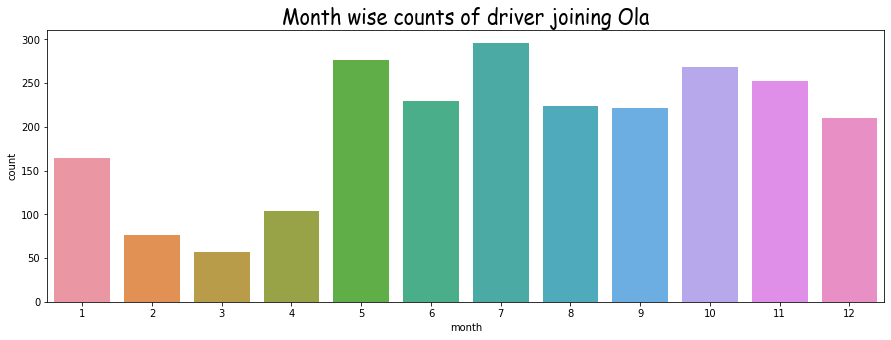

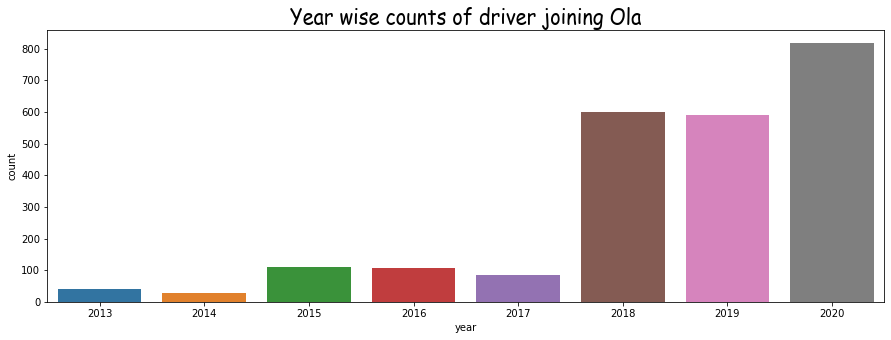

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(df2['month'])
plt.title(
'Month wise counts of driver joining Ola',
fontsize=20,
fontname='Comic Sans MS')

plt.figure(figsize=(15,5))
sns.countplot(df2['year'])
plt.title(
'Year wise counts of driver joining Ola',
fontsize=20,
fontname='Comic Sans MS')
plt.show()

### OBSERVATIONS 1
---

- **Most** of the drivers **joined Ola** between **2018 - 2020**.


- We can observe the **least joining month** is **March** and the **highest joining month** is **July**.

---
### Creating data X and Y

In [12]:
df2 = df2[[
    'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income',
    'Joining Designation', 'Grade', 'Quarterly Rating', 'times_reported',
    'Total Business Value', 'month', 'year','target']]

In [13]:
# Set quaterly rating increased to 1
QR = pd.DataFrame(
    df.groupby('Driver_ID')['Quarterly Rating'].unique()).reset_index()
a = df.groupby('Driver_ID')['Quarterly Rating'].first().reset_index()
b = df.groupby('Driver_ID')['Quarterly Rating'].last().reset_index().rename(
                   columns={'Quarterly Rating': 'QR'})
QR = a.merge(b,on= 'Driver_ID')
QR['qtr_rtng_incrsd'] = np.where(QR['QR']>QR['Quarterly Rating'],1,0)
QR = QR[['Driver_ID','qtr_rtng_incrsd']]


# Set income increased to 1
Incm = pd.DataFrame(
    df.groupby('Driver_ID',
               dropna=False)['Income'].first()).reset_index()
Incm1 = pd.DataFrame(
    df.groupby('Driver_ID',
               dropna=False)['Income'].last()).reset_index().rename(columns={'Income':'I'})
QR['incm_incrsd'] = np.where(Incm1['I'] >Incm['Income'],1,0)



# merged
df2 = df2.merge(QR,on='Driver_ID')

In [14]:
df2.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Quarterly Rating,times_reported,Total Business Value,month,year,target,qtr_rtng_incrsd,incm_incrsd
0,1,28.0,0.0,C23,2,172161,1,1.0,2.0,3,1715580,12,2018,1,0,0
1,2,31.0,0.0,C7,2,134032,2,2.0,1.0,2,0,11,2020,0,0,0
2,4,43.0,0.0,C13,2,328015,2,2.0,1.0,5,350000,12,2019,1,0,0
3,5,29.0,0.0,C9,0,139104,1,1.0,1.0,3,120360,1,2019,1,0,0
4,6,31.0,1.0,C11,1,393640,3,3.0,1.6,5,1265000,7,2020,0,1,0


---
**TARGET ENCODING**
---

In [15]:
from category_encoders import TargetEncoder
TEncoder = TargetEncoder()
df2['City'] = TEncoder.fit_transform(df2['City'],df2["target"]).round(2)

In [16]:
X = df2[[
    'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income',
    'Joining Designation', 'Grade', 'Quarterly Rating', 'times_reported',
    'Total Business Value', 'month', 'year','qtr_rtng_incrsd','incm_incrsd'
]]

Y = df2[['target']]

In [17]:
X.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Quarterly Rating,times_reported,Total Business Value,month,year,qtr_rtng_incrsd,incm_incrsd
0,1,28.0,0.0,0.76,2,172161,1,1.0,2.0,3,1715580,12,2018,0,0
1,2,31.0,0.0,0.64,2,134032,2,2.0,1.0,2,0,11,2020,0,0
2,4,43.0,0.0,0.77,2,328015,2,2.0,1.0,5,350000,12,2019,0,0
3,5,29.0,0.0,0.65,0,139104,1,1.0,1.0,3,120360,1,2019,0,0
4,6,31.0,1.0,0.64,1,393640,3,3.0,1.6,5,1265000,7,2020,1,0


In [18]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=5)
knn = impute_knn.fit_transform(X)

In [19]:
X = pd.DataFrame(knn,columns=X.columns)

### Data X and Y is created

In [81]:
# Conditional probability function
 
def cond_prob(i, j):
    Joint_vals_fitness = pd.crosstab(i, j, normalize=True)
    product = Joint_vals_fitness.sum(axis=0)
    cond_Prob = Joint_vals_fitness.divide(product, axis=1)
    return cond_Prob.plot.bar(
        figsize=(12, 5),
        grid=True,
        color=('black', 'gold', 'chartreuse', 'r', 'm', 'darkorange',
               'dimgrey', 'c', 'yellow', 'deeppink', 'moccasin',
               'midnightblue', 'olivedrab', 'olive', 'palegreen', 'powderblue',
               'mediumvioletred', 'beige', 'khaki', 'firebrick',
               'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro',
               'ghostwhite', 'goldenrod', 'gray', 'green',
               'greenyellow', 'honeydew', 'hotpink', 'indianred', 'indigo',
               'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen',
               'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan',
               'lightgoldenrodyellow', 'lightgreen', 'lightgray', 'lightpink',
               'lightsalmon', 'lightseagreen', 'lightskyblue',
               'lightslategray', 'lightsteelblue', 'lightyellow', 'lime',
               'limegreen', 'linen', 'magenta', 'maroon', 'mediumaquamarine',
               'mediumblue', 'mediumorchid', 'mediumpurple', 'mediumseagreen',
               'mediumslateblue', 'mediumspringgreen', 'mediumturquoise',
               'mediumvioletred', 'midnightblue', 'mintcream', 'mistyrose',
               'moccasin', 'navajowhite', 'navy', 'oldlace', 
               'olivedrab'))

In [72]:
df3 =df2.copy()
df3['age'] = pd.cut(df3.Age, bins=[10,20,30,40,50,60], labels=['10-20','20-30','30-40','40-50','50-60'])

df3['grade'] = pd.cut(df3.Grade, bins=[0,1,2,3,4,5], labels=['1','2','3','4','5']) 

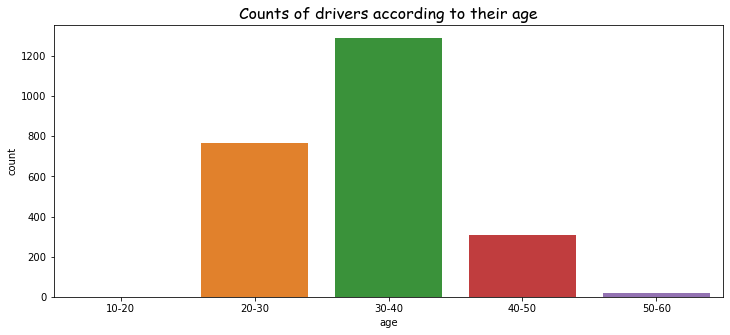

In [77]:
plt.figure(figsize=(12,5))
sns.countplot(df3.age)
plt.title(
'Counts of drivers according to their age',
fontsize=16,
fontname='Comic Sans MS')
plt.show()

### OBSERVATIONS 2
---

- Most of the drivers falls between 30-40 age group with 1200 drivers.



- All the drivers are nearly from age group 20-50 . 

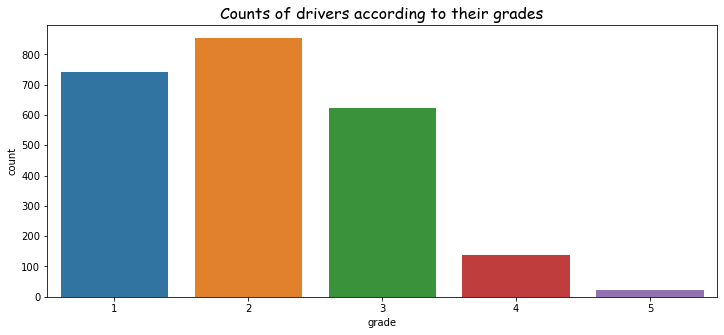

In [76]:
plt.figure(figsize=(12,5))
sns.countplot(df3.grade)
plt.title(
'Counts of drivers according to their grades',
fontsize=16,
fontname='Comic Sans MS')
plt.show()

### OBSERVATIONS 3
---

- Most   frequent   grade is grade 2 and 1 and 3 are the top grades among all others.

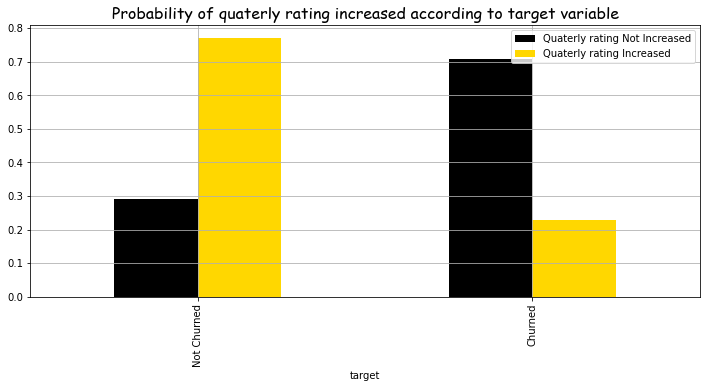

In [102]:
cond_prob(df3.target,df3.qtr_rtng_incrsd )
plt.title(
'Probability of quaterly rating increased according to target variable',
fontsize=16,
fontname='Comic Sans MS')
pos = [0,1]
val = ['Not Churned','Churned']
plt.legend(['Quaterly Rating Not Increased','Quaterly Rating Increased'])
plt.xticks(pos,val)
plt.show()

### OBSERVATIONS 4
---

- Probability of **quaterly rating increasd** is significantly **high** among **not churned drivers**, which means drivers whose quaterly rating increased are most likely to stay.


- Probability of **quaterly rating not increasd** is significantly **high** among **churned drivers**, which means drivers whose quaterly rating didnt increased are most likely to leave.


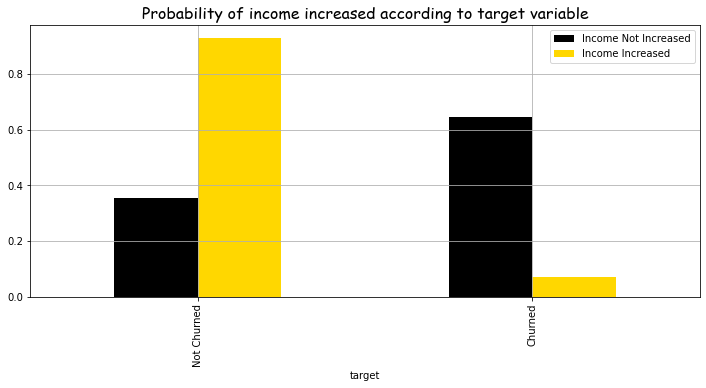

In [101]:
cond_prob(df3.target,df3.incm_incrsd )
plt.title(
'Probability of income increased according to target variable',
fontsize=16,
fontname='Comic Sans MS')
pos = [0,1]
val = ['Not Churned','Churned']
plt.legend(['Income Not Increased','Income Increased'])
plt.xticks(pos,val)
plt.show()

### OBSERVATIONS 5
---

- Probability of **income increased** is significantly **high** among **not churned drivers**, which means drivers whose **income increased** are most likely to **stay**.


- Probability of **income not increased** is significantly **high** among **churned drivers**, which means drivers whose **income didnt increased** are most likely to **leave**.


In [20]:
# DESCRIBE

df2.describe().round(2)

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Quarterly Rating,times_reported,Total Business Value,month,year,target,qtr_rtng_incrsd,incm_incrsd
count,2381.00,2381.00,2375.00,2381.00,2381.00,2381.00,2381.00,2381.00,2381.00,2381.00,2381.00,2381.00,2381.00,2381.00,2381.00,2381.00
mean,1397.56,33.66,0.41,0.64,1.01,526760.31,1.82,2.08,1.57,8.02,4586741.82,7.36,2018.54,0.64,0.15,0.02
std,806.16,5.98,0.49,0.07,0.82,623163.28,0.84,0.93,0.72,6.78,9127115.31,3.14,1.61,0.48,0.36,0.13
min,1.00,21.00,0.00,0.49,0.00,10883.00,1.00,1.00,1.00,1.00,-1385530.00,1.00,2013.00,0.00,0.00,0.00
25%,695.00,29.00,0.00,0.58,0.00,139895.00,1.00,1.00,1.00,3.00,0.00,5.00,2018.00,0.00,0.00,0.00
50%,1400.00,33.00,0.00,0.64,1.00,292980.00,2.00,2.00,1.00,5.00,817680.00,7.00,2019.00,1.00,0.00,0.00
75%,2100.00,37.00,1.00,0.69,2.00,651456.00,2.00,3.00,2.00,10.00,4173650.00,10.00,2020.00,1.00,0.00,0.00
max,2788.00,58.00,1.00,0.77,2.00,4522032.00,5.00,5.00,4.00,24.00,95331060.00,12.00,2020.00,1.00,1.00,1.00


### OBSERVATIONS 6
---
***STORY***
- Nearly 50% of the drivers are of age 33 , means every one out of two drivers are of age 33.


- On an average a single driver creates total business of   ₹ 4586741   in approx 8 reporting time.



- On an average they earn ₹ 526760 which is nearly 11.5 % .i.e 10% approx of the total business created.


- Most of the drivers have lower education level.

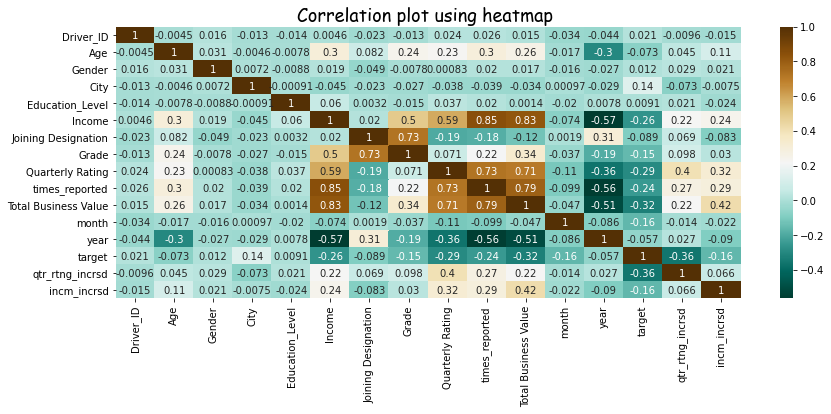

In [21]:
#CORRELATION PLOT

plt.figure(figsize=(14,5))
sns.heatmap(df2.corr(),annot=True,cmap='BrBG_r')
plt.title(
    'Correlation plot using heatmap ',
    fontsize=18,
    fontname='Comic Sans MS')
plt.show()

### OBSERVATIONS 7

---


- **Quaterly rating** increased has the strongest negative correaltion with target variable which depicts that, driver's whose quaterly rating **didnt increased** are **most likely** to leave (**get churned**).






- **Total business value** has the second strongest negetive correlation with target variable which depicts that, **driver that creates less business** are most likely to leave (**get churned**).






- **Times reported** has the third strongest negetive correlation with target variable which depicts that, driver that has **less reporting time** are most likely to leave (**get churned**).






- **Grades** and **Income** has negetive correlation with target variable which depicts that, driver that has **less grades and  income** are most likely to leave (**get churned**).



- 

---
**OUTLIER TREATMENT**
---

In [194]:

def remove_outliers(column,df2):
    q1 = df2[column].quantile(.25)
    q3 = df2[column].quantile(.75)
    iqr = q3 - q1

    maxx = q3 + 1.5 * iqr
    minn = q1 - 1.5 * iqr
    sns.boxplot(y=df2.loc[((df2[column]>=minn) & (df2[column]<=maxx))][column])

In [203]:
z = [
    'Age', 'Income', 'Joining Designation', 'times_reported',
    'Total Business Value', 'year'
]

In [207]:
# Correlation before outlier removal.


df2.corr().mean().mean()

0.1018124444692129

In [220]:
# Correlation after outlier removal.


df2.corr().mean().mean()

0.11273847638671326

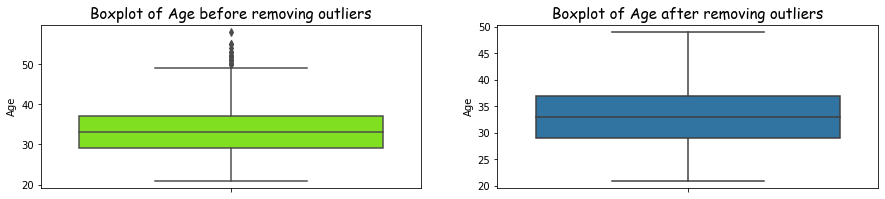

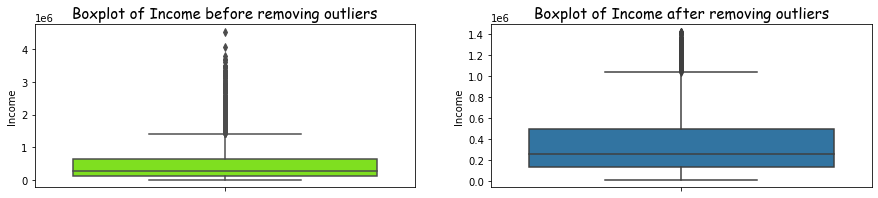

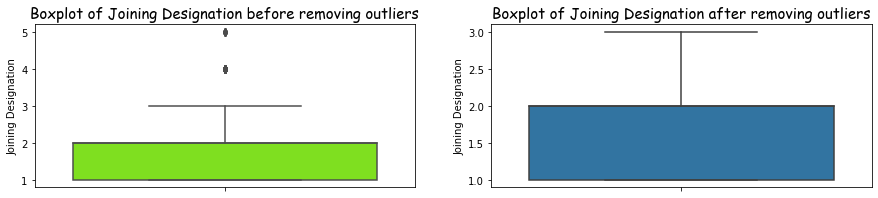

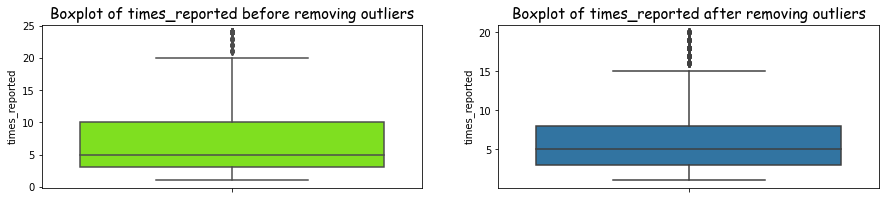

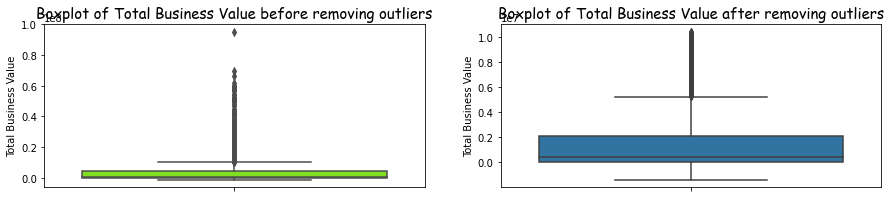

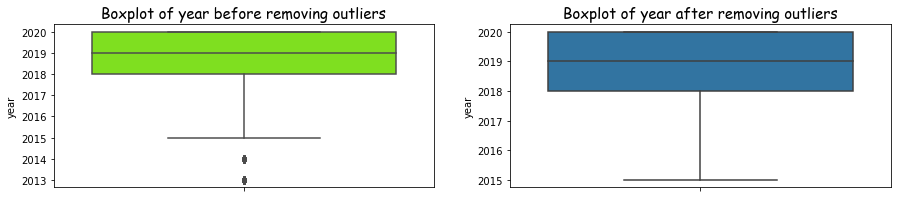

In [198]:
# Illustration before and after outler removal.

for i in z:
    plt.figure(figsize=(15, 3))
    plt.subplot(121)
    sns.boxplot(y=df2[i], color='chartreuse')
    plt.title(f"Boxplot of {i} before removing outliers", fontsize=15, fontname='Comic Sans MS')
    plt.subplot(122)
    remove_outliers(i,df2)
    plt.title(f"Boxplot of {i} after removing outliers",
              fontsize=15,
              fontname='Comic Sans MS')

    plt.show()

### OBSERVATIONS 8
---
***Above illustration represents outliers and non-outliers features***


- Age above 50 are outliers.



- Years under 2015 are outliers.


- Joining Desigation above 3 are outliers.



- Income holders above 1410000 are outliers.




- Total business value above 110000000 are outliers.





---
**ENSEMBLE TECNIQUES : BAGGING & BOOSTING**
---

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, roc_auc_score, accuracy_score


def log_reg(X, y):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, roc_auc_score, accuracy_score
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=1)
    lr = BaggingClassifier(base_estimator=DecisionTreeClassifier(
        class_weight='balanced', max_depth=6),
                           n_estimators=2)
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)
    prob = lr.predict_proba(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print('Train Score : ', lr.score(X_train, y_train), '\n')
    print('Test Score : ', lr.score(X_test, y_test), '\n')
    print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
    print(cm, "---> confusion Matrix ", '\n')
    print("ROC-AUC score  test dataset:  ", roc_auc_score(y_test, prob[:, 1]),
          '\n')
    print("precision score  test dataset:  ", precision_score(y_test, y_pred),
          '\n')
    print("Recall score  test dataset:  ", recall_score(y_test, y_pred), '\n')
    print("f1 score  test dataset :  ", f1_score(y_test, y_pred), '\n')
    return (prob[:, 1], y_test)


def log_reg_scaled(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=1)
    lr = GradientBoostingClassifier()
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    weights = lr.feature_importances_
    prob = lr.predict_proba(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print('Train Score : ', lr.score(X_train, y_train), '\n')
    print('Test Score : ', lr.score(X_test, y_test), '\n')
    print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
    print(cm, "---> confusion Matrix ", '\n')
    print("ROC-AUC score  test dataset:  ", roc_auc_score(y_test, prob[:, 1]),
          '\n')
    print("precision score  test dataset:  ", precision_score(y_test, y_pred),
          '\n')
    print("Recall score  test dataset:  ", recall_score(y_test, y_pred), '\n')
    print("f1 score  test dataset :  ", f1_score(y_test, y_pred), '\n')
    return (prob[:, 1], y_test, weights)

In [23]:
def plot_pre_curve(y_test,prob):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(y_test, prob)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    # plot the precision-recall curve for the model
    plt.plot(recall, precision, marker='.')
    plt.title("Precision Recall curve",fontname='Comic Sans MS',fontsize=15)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the plot
    plt.show()
    
def plot_roc(y_test,prob):
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(y_test, prob)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title("ROC curve",fontname='Comic Sans MS',fontsize=15)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    # show the plot
    plt.show()


---
**BAGGING**
---

__________________________________________________ 

                     BAGGING
__________________________________________________
Train Score :  0.9196428571428571 

Test Score :  0.9140461215932913 

Accuracy Score :  0.9140461215932913 

[[156  12]
 [ 29 280]] ---> confusion Matrix  

ROC-AUC score  test dataset:   0.966067575897673 

precision score  test dataset:   0.958904109589041 

Recall score  test dataset:   0.9061488673139159 

f1 score  test dataset :   0.9317803660565723 

____________________________________________________________


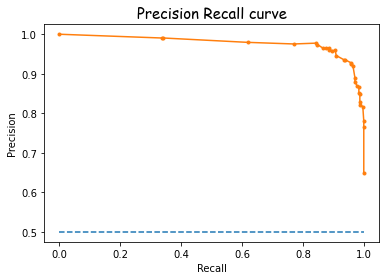

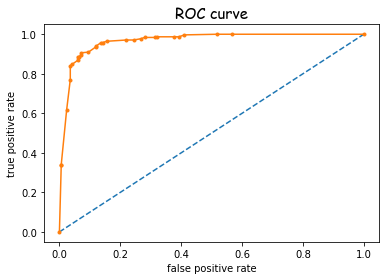

In [24]:
print('_'*50,'\n')
print('                     BAGGING')
print('_'*50)

prob,y_test=log_reg(X,Y)


print('_' * 60)
plot_pre_curve(y_test, prob)
plot_roc(y_test, prob)

---
**BOOSTING**
---

__________________________________________________ 

           BOOSTING  ||BEST MODEL*****||
__________________________________________________
Train Score :  0.9543067226890757 

Test Score :  0.9412997903563941 

Accuracy Score :  0.9412997903563941 

[[154  14]
 [ 14 295]] ---> confusion Matrix  

ROC-AUC score  test dataset:   0.977394436739097 

precision score  test dataset:   0.9546925566343042 

Recall score  test dataset:   0.9546925566343042 

f1 score  test dataset :   0.9546925566343042 

____________________________________________________________


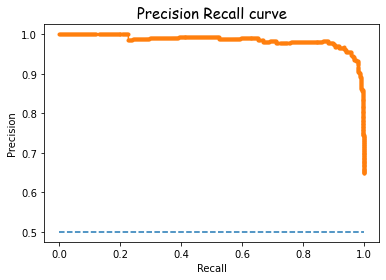

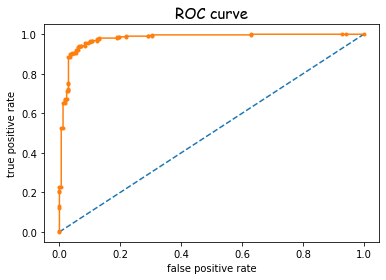

In [25]:
print('_'*50,'\n')
print('           BOOSTING  ||BEST MODEL*****||')
print('_'*50)

prob,y_test,weights=log_reg_scaled(X,Y)

print('_' * 60)
plot_pre_curve(y_test, prob)
plot_roc(y_test, prob)

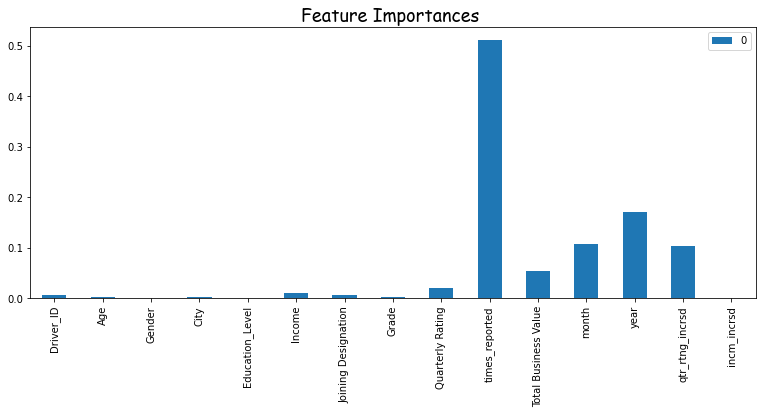

In [26]:

pd.DataFrame(data = weights,index=X.columns).plot(kind='bar',figsize=(13,5))
plt.title(
    'Feature Importances ',
    fontsize=18,
    fontname='Comic Sans MS')
plt.show()

### OBSERVATIONS 9
---

***For an imbalancd dataset the most significant metrics is F1 score, it combines both precision and recall in one metric by taking weighted average or harmonic mean of both precision and recall.***


-  Best F1 score is 95.79 from the above **Boosting Model**.



-  Best AUC-ROC score is 97.79 from the above **Boosting Model**.



- From the above **Boosting Model** we can observe the best train and test score of 95 and 94.





- Feature that has **strongest weight** is **times reported** and it contributes most of the variance.



- Few of the other top features are **total business value** , **month** , **year** , **quaterly rating increased**.
 



---
**Appliying PCA and TruncatedSVD**
---

In [27]:
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

In [28]:
scaler = StandardScaler()
X4_pca = scaler.fit_transform(X)


X_reduced_svd = TruncatedSVD(n_components=1, algorithm='randomized', random_state=42).fit_transform(X4_pca)
X_reduced_pca = PCA(n_components=6, random_state=42).fit_transform(X4_pca)



print('_'*60,'\n')
print('       Dimensionality reduction by TruncatedSVD')
print('_'*60)
d = log_reg(X_reduced_svd,Y)
print('_'*60,'\n')
print('       Dimensionality reduction by PCA')
print('_'*60)
d1 = log_reg(X4_pca,Y)




____________________________________________________________ 

       Dimensionality reduction by TruncatedSVD
____________________________________________________________
Train Score :  0.7232142857142857 

Test Score :  0.6792452830188679 

Accuracy Score :  0.6792452830188679 

[[ 74  94]
 [ 59 250]] ---> confusion Matrix  

ROC-AUC score  test dataset:   0.6499653259361998 

precision score  test dataset:   0.7267441860465116 

Recall score  test dataset:   0.8090614886731392 

f1 score  test dataset :   0.765696784073507 

____________________________________________________________ 

       Dimensionality reduction by PCA
____________________________________________________________
Train Score :  0.9259453781512605 

Test Score :  0.9287211740041929 

Accuracy Score :  0.9287211740041929 

[[159   9]
 [ 25 284]] ---> confusion Matrix  

ROC-AUC score  test dataset:   0.9697083525967022 

precision score  test dataset:   0.9692832764505119 

Recall score  test dataset:   0.9190938

---
***We can observe there is not much improvements using dimensionality reduction techniques like  PCA, TruncatedSVD.***

---

**UNDERSAMPLING**
---

In [29]:
def undersampling(X,y,i):

    from sklearn.utils import resample
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)
    
    X=pd.concat([X_train,y_train],axis=1)

    default = X[i ==0]
    paid = X[i ==1]

    df_downsampled = resample(paid,replace=True,n_samples=len(default),random_state=27)
    downsampled = pd.concat([default,df_downsampled])
    return downsampled

In [30]:
undersample = undersampling(X,Y,Y['target'])

In [31]:
y_unders = undersample['target']

In [32]:
x_unders = undersample.loc[:,undersample.columns!='target']

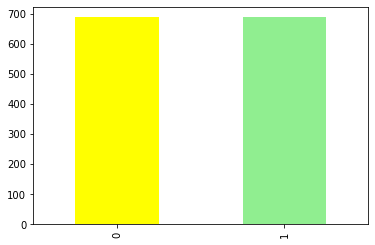

In [33]:
y_unders.value_counts().plot(
    kind='bar',
    color=('yellow', 'lightgreen')
)
plt.show()

__________________________________________________ 

             UNDERSAMPLED BAGGING
__________________________________________________
Train Score :  0.9218181818181819 

Test Score :  0.9166666666666666 

Accuracy Score :  0.9166666666666666 

[[129   8]
 [ 15 124]] ---> confusion Matrix  

ROC-AUC score  test dataset:   0.957806017959355 

precision score  test dataset:   0.9393939393939394 

Recall score  test dataset:   0.8920863309352518 

f1 score  test dataset :   0.915129151291513 

____________________________________________________________


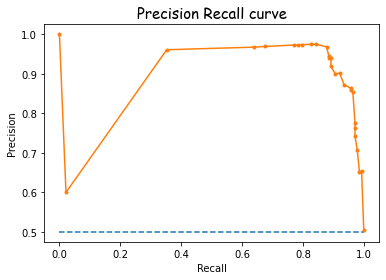

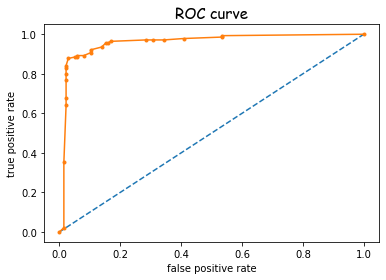

In [34]:
print('_'*50,'\n')
print('             UNDERSAMPLED BAGGING')
print('_'*50)

prob, y_test = log_reg(x_unders,y_unders)


print('_' * 60)
plot_pre_curve(y_test, prob)
plot_roc(y_test, prob)

__________________________________________________ 

             UNDERSAMPLED BOOSTING
__________________________________________________
Train Score :  0.9627272727272728 

Test Score :  0.9311594202898551 

Accuracy Score :  0.9311594202898551 

[[128   9]
 [ 10 129]] ---> confusion Matrix  

ROC-AUC score  test dataset:   0.9799926482171927 

precision score  test dataset:   0.9347826086956522 

Recall score  test dataset:   0.9280575539568345 

f1 score  test dataset :   0.9314079422382672 

____________________________________________________________


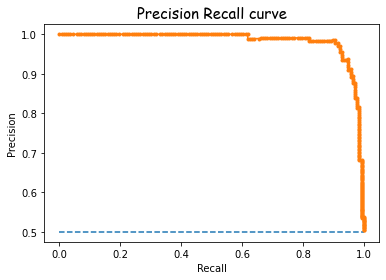

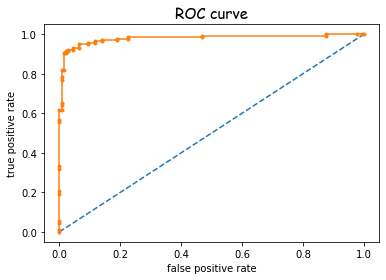

In [35]:
print('_'*50,'\n')
print('             UNDERSAMPLED BOOSTING')
print('_'*50)
prob, y_test ,weights=log_reg_scaled(x_unders,y_unders)


print('_' * 60)
plot_pre_curve(y_test, prob)
plot_roc(y_test, prob)

---

**OVERSAMPLING**
---

In [36]:
# OVERSAMPLING USING SMOTE 

from imblearn.over_sampling import SMOTE
s = SMOTE()
x_overs,y_overs = s.fit_resample(X,Y)

In [37]:
x_overs.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Quarterly Rating,times_reported,Total Business Value,month,year,qtr_rtng_incrsd,incm_incrsd
0,1.0,28.0,0.0,0.76,2.0,172161.0,1.0,1.0,2.0,3.0,1715580.0,12.0,2018.0,0.0,0.0
1,2.0,31.0,0.0,0.64,2.0,134032.0,2.0,2.0,1.0,2.0,0.0,11.0,2020.0,0.0,0.0
2,4.0,43.0,0.0,0.77,2.0,328015.0,2.0,2.0,1.0,5.0,350000.0,12.0,2019.0,0.0,0.0
3,5.0,29.0,0.0,0.65,0.0,139104.0,1.0,1.0,1.0,3.0,120360.0,1.0,2019.0,0.0,0.0
4,6.0,31.0,1.0,0.64,1.0,393640.0,3.0,3.0,1.6,5.0,1265000.0,7.0,2020.0,1.0,0.0


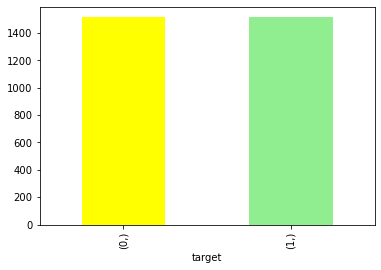

In [38]:
y_overs.value_counts().plot(
    kind='bar',
    color=('yellow', 'lightgreen')
)
plt.show()

__________________________________________________ 

             OVERSAMPLED BAGGING
__________________________________________________
Train Score :  0.9281585466556564 

Test Score :  0.9191419141914191 

Accuracy Score :  0.9191419141914191 

[[253  35]
 [ 14 304]] ---> confusion Matrix  

ROC-AUC score  test dataset:   0.9753777952480782 

precision score  test dataset:   0.8967551622418879 

Recall score  test dataset:   0.9559748427672956 

f1 score  test dataset :   0.9254185692541858 

____________________________________________________________


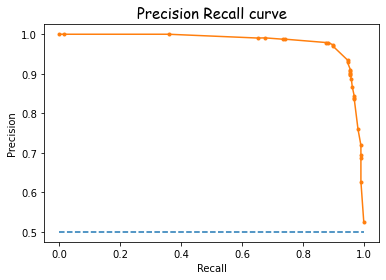

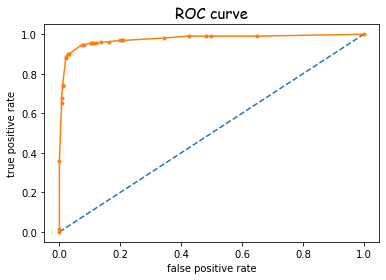

In [39]:
print('_'*50,'\n')
print('             OVERSAMPLED BAGGING')
print('_'*50)
prob, y_test = log_reg(x_overs,y_overs)


print('_' * 60)
plot_pre_curve(y_test, prob)
plot_roc(y_test, prob)

__________________________________________________ 

             OVERSAMPLED BOOSTING
__________________________________________________
Train Score :  0.9632535094962841 

Test Score :  0.9471947194719472 

Accuracy Score :  0.9471947194719472 

[[272  16]
 [ 16 302]] ---> confusion Matrix  

ROC-AUC score  test dataset:   0.9823768343815513 

precision score  test dataset:   0.949685534591195 

Recall score  test dataset:   0.949685534591195 

f1 score  test dataset :   0.949685534591195 

____________________________________________________________


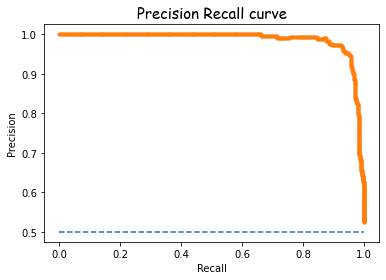

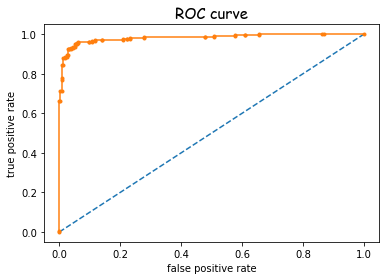

In [40]:
print('_'*50,'\n')
print('             OVERSAMPLED BOOSTING')
print('_'*50)
prob, y_test ,weights=log_reg_scaled(x_overs,y_overs)


print('_' * 60)
plot_pre_curve(y_test, prob)
plot_roc(y_test, prob)

### OVSERBATIONS 10
---


- After **oversampling and undersampling of data** we can observe **AUC-ROC score** as **98.28** in **boosting models** which reflects good improvement over previous models.



- We can observe little improvement in **precision score** .i.e **96.18** in **undersampled bagging model**.

---

**K-FOLD CROSSVALIDATION**
---

In [41]:
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [42]:
kfold = StratifiedKFold(n_splits=10)

In [43]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

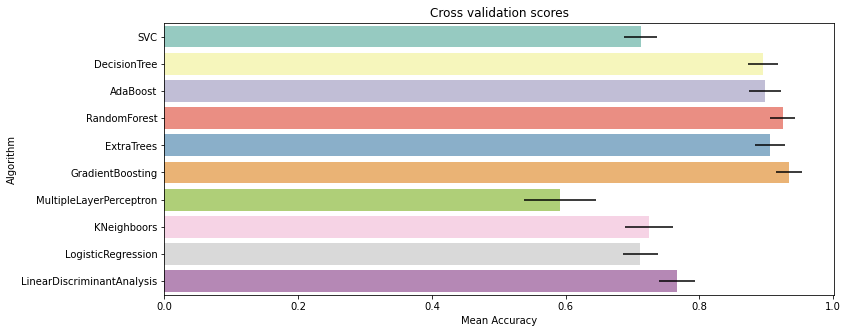

In [44]:
# Modeling step Test differents algorithms
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(
    AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),
                       random_state=random_state,
                       learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers:
    cv_results.append(
        cross_val_score(classifier,
                        X_train,
                        y=Y_train,
                        scoring="accuracy",
                        cv=kfold,
                        n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({
    "CrossValMeans":
    cv_means,
    "CrossValerrors":
    cv_std,
    "Algorithm": [
        "SVC", "DecisionTree", "AdaBoost", "RandomForest", "ExtraTrees",
        "GradientBoosting", "MultipleLayerPerceptron", "KNeighboors",
        "LogisticRegression", "LinearDiscriminantAnalysis"
    ]
})

plt.figure(figsize=(12, 5))
g = sns.barplot("CrossValMeans",
                "Algorithm",
                data=cv_res,
                palette="Set3",
                orient="h",
                **{'xerr': cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

---
***From above k-fold crossvalidation two top models comes out to be Gradient Boosting and Random Forest with 90+ scores***


---
**OPTIMAL MODELS FROM CROSSVALIDATION**
---

In [45]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


0.9343593276384679

In [46]:
# RFC Parameters tunning 

RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.932254064480573

---
**PLOTING LEARNING CURVES OF OPTIMAL MODELS**

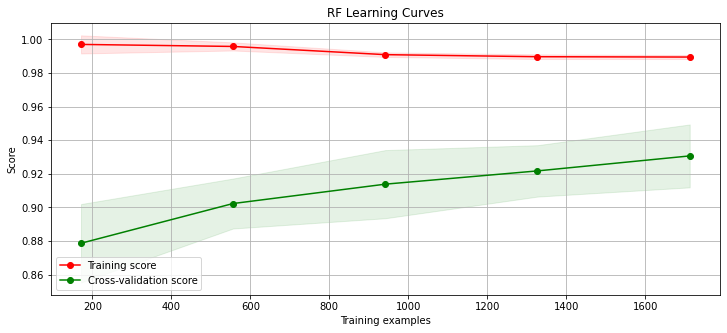

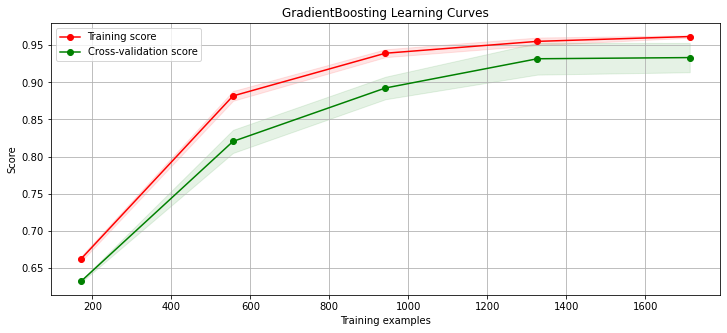

In [47]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure(figsize=(12,5))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.figure(figsize=(10,5))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF Learning Curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting Learning Curves",X_train,Y_train,cv=kfold)


***Illustration of learning curve of top two models .i.e GBDT and RF.***
---
---

---
---
----
----
----
---
# **INSIGHTS**
---




- **OBSERVATIONS 1**



1) Most of the drivers joined Ola between 2018 - 2020.



2)We can observe the least joining month is March and the highest joining month is July.


- **OBSERVATIONS 2**



1) Most of the drivers falls between 30-40 age group with 1200 drivers.




2) All the drivers are nearly from age group 20-50 .



- **OBSERVATIONS 3**


1) Most frequent grade is grade 2 and 1 and 3 are the top grades among all others.




- **OBSERVATIONS 4**



1) Probability of quaterly rating increasd is significantly high among not churned drivers, which means drivers whose quaterly rating increased are most likely to stay.



2) Probability of quaterly rating not increasd is significantly high among churned drivers, which means drivers whose quaterly rating didnt increased are most likely to leave.





- **OBSERVATIONS 5**



1)  Probability of income increased is significantly high among not churned drivers, which means drivers whose income increased are most likely to stay.



2) Probability of income not increased is significantly high among churned drivers, which means drivers whose income didnt increased are most likely to leave.





- **OBSERVATIONS 6**


$STORY$

1) Nearly 50% of the drivers are of age 33 , means every one out of two drivers are of age 33.



2) On an average a single driver creates total business of ₹ 4586741 in approx 8 reporting time.



3) On an average they earn ₹ 526760 which is nearly 11.5 % .i.e 10% approx of the total business created.



4) Most of the drivers have lower education level.



- **OBSERVATIONS 7**



1) Quaterly rating increased has the strongest negative correaltion with target variable which depicts that, driver's whose quaterly rating didnt increased are most likely to leave (get churned).



2) Total business value has the second strongest negetive correlation with target variable which depicts that, driver that creates less business are most likely to leave (get churned).



3) Times reported has the third strongest negetive correlation with target variable which depicts that, driver that has less reporting time are most likely to leave (get churned).




4) Grades and Income has negetive correlation with target variable which depicts that, driver that has less grades and income are most likely to leave (get churned).




- **OBSERVATIONS 8**



1) Above illustration represents outliers and non-outliers features




2) Age above 50 are outliers.




3) Years under 2015 are outliers.



4) Joining Desigation above 3 are outliers.



5)  Income holders above 1410000 are outliers.



6) Total business value above 110000000 are outliers.




- **OBSERVATIONS 9**



1)  For an imbalancd dataset the most significant metrics is F1 score, it combines both precision and recall in one metric by taking weighted average or harmonic mean of both precision and recall.




2) Best F1 score is 95.79 from the above Boosting Model.




3) Best AUC-ROC score is 97.79 from the above Boosting Model.



4) From the above Boosting Model we can observe the best train and test score of 95 and 94.



5)  Feature that has strongest weight is times reported and it contributes most of the variance.




6)  Few of the other top features are total business value , month , year , quaterly rating increased.


- **OVSERBATIONS 10**



1)  After oversampling and undersampling of data we can observe AUC-ROC score as 98.28 in boosting models which reflects good improvement over previous models.



2)  We can observe little improvement in precision score .i.e 96.18 in undersampled bagging model.


---
# **RECOMMENDATIONS**
---

- From observation 6 we can observe, on an average Ola pays **11.5 %** **of** their **total business** value **to drivers** and it is not fixed, Ola should **cut margins** from **high paying drivers** and use the margins to **retain low paying drivers** according to their prodctivity.


- From observations 4 and 5 we can observe, those **drivers** tends to **stay** whose **incomes** and **quaterly ratings** are **increased**, thus Ola needs to increase income and quaterly rating to retain drivers who are working with them for long time.


- From observation 7 we can observe, drivers that has comparatively **less reporting time** are most likely to **leave** (get churned), thus to keep them connected Ola needs to **provide perks and good incomes**.



- From observation 1 we can observe, counts of **drivers** are **increasing** drastically **every year** and **July** sees the **highest joining** numbers where as **March** sees the **least joining** numbers, Ola should **lower** their operations in the **month of March** and **higher** their operations in the month of **July** for **new hires**.

---